TO: Freedom 

FROM: Korrenti Mayweather

SUBJECT: REQUEST FOR COMMENTS ON THE PRACTICAL EXAMPLE OF SAMPLING
PLANS FOR NEW COMMERCIAL AD CAMPAIGN

DEADLINE: May 1, 2017

COMMENTS: To: Copy to:
Korrenti Mayweather
Data Scientist

Email: korrenti.mayweather@freedom.com



## Background

How to create a better ad campaign to help stop teens from smoking? Our previous "Smoke Is A Joke" commercial ad in Georgia has lost its effectiveness as we have noticed an increase in teen tobacco use.  In recent surveys, teens have shown a disconnect between what smoking does to older adults and how it effects adolescents.  Our previous commercial highlights what happens to older adults but neglects to show how teens are affected.  

## Hypothesis

Changing the focus of our commercial in Georgia to demonstrate the impact tobacco use can have on teens will decrease teen tobacco use.

## Practical Example of Sampling Plans

Create a new commercial advertisement that shows the extent to which tobacco use can effect teens so that our message of "Smoke is a Joke" hits home.  Stop running all of our ad campaigns in Georgia and test our new commercial for two months.  At the end of the two months, we will administer a survey to a sample of 2 thousand middle and high school teen smokers in Georgia asking if they have seen the old advert, the new one, and if the new commercial has had any impact on their smoking habits.  We will look at the mean and standard deviation of the previous month's data for teen smoking in Georgia and compare them to those of our new data.  We will also look at subsets like gender, frequent teen smokers, and smokeless tobacco users to see if our commercial has an impact on these subgroups. We will use this data to determine if there is a correlation between our new commercial and teen tobacco use. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


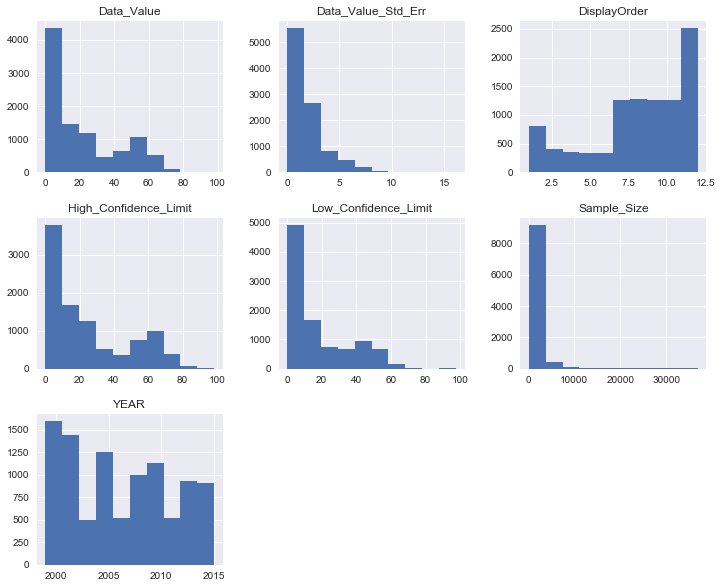

YEAR                     2006.261691
Data_Value                 20.967830
Data_Value_Std_Err          1.874416
Low_Confidence_Limit       17.305892
High_Confidence_Limit      24.638136
Sample_Size              1504.883659
DisplayOrder                8.093527
dtype: float64
YEAR                        4.902296
Data_Value                 20.832585
Data_Value_Std_Err          1.727172
Low_Confidence_Limit       18.329793
High_Confidence_Limit      23.550957
Sample_Size              2211.548266
DisplayOrder                3.086392
dtype: float64


In [2]:
# Loading raw data
yts = pd.read_csv('Youth_Tobacco_Survey__YTS__Data.csv')

# Loading meta data to get a better understanding of our dataset
yts_meta = pd.read_csv('YTS_meta_data.json')
# print(yts_meta)

# Imputing missing data by replacing missing numeric data with the mean 
yts.fillna(yts.mean(),inplace=True)
 
# getting a subset of the data for our purposes 
ga_yts = yts[72:96]
ga_yts_15= yts[78:81]

# General Teen Smokers in Georga
df_ga_yts = yts.loc[
    ((yts['LocationAbbr'] == 'GA') & (yts['Response'] == 'Current')),
    ['LocationAbbr', 'Gender', 'Data_Value', 'YEAR']
]
# GA Teen Smokers of Smokeless Tobacco
df_ga_smokeless = yts.loc[
    ((yts['LocationAbbr'] == 'GA') & (yts['Response'] == 'Current') & (yts['TopicDesc'] == 'Smokeless Tobacco Use (Youth)')),
    ['LocationAbbr', 'Gender', 'Data_Value', 'YEAR']
]

# GA Teen Frequent Smokers
df_ga_frequent = yts.loc[
    ((yts['LocationAbbr'] == 'GA') & (yts['Response'] == 'Frequent')),
    ['LocationAbbr', 'Gender', 'Data_Value', 'YEAR']
]
# setting the size for our histogram
fig, ax = plt.subplots(figsize=(12,10))

# generating our histogram
yts.hist(ax=ax)
plt.show()

print(yts.mean())
print(yts.std())

# print(ttest_ind(sample2, sample1, equal_var=False))

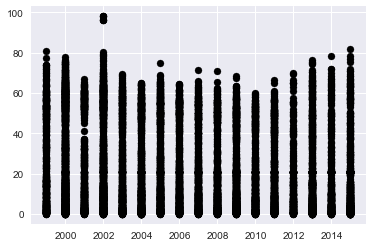

In [3]:
plt.scatter(yts['YEAR'], yts['Data_Value'], color='black')
plt.show()

In [4]:
ga_youth_cig_use_2015 = yts[78:81].groupby(['Gender', 'Data_Value', 'YEAR'])['YEAR'].sum()

ga_youth_cig_use_2013 = yts[1000:1005].groupby(['Gender', 'Data_Value', 'YEAR'])['YEAR'].sum()

df_gycu_2013 = ga_youth_cig_use_2013.iloc[1:2]
df_gycu_2013 = df_gycu_2013.append(ga_youth_cig_use_2013.iloc[3:5])

print(df_gycu_2013)



Gender   Data_Value  YEAR
Female   9.7         2013    2013
Male     14.3        2013    2013
Overall  12.0        2013    2013
Name: YEAR, dtype: int64


[<matplotlib.text.Text at 0x119c7cfd0>, <matplotlib.text.Text at 0x119c70ef0>]

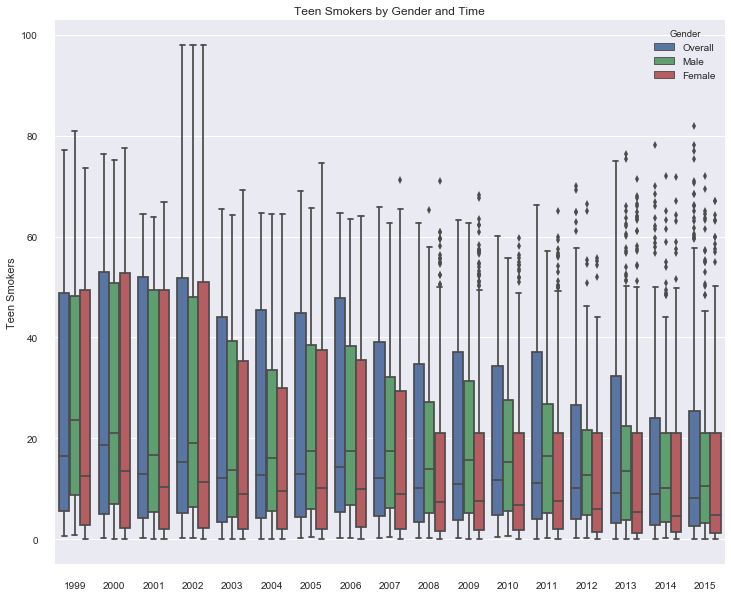

In [5]:
# Creating a Boxplot to look at the data by gender over time and check for outliers

fig, ax = plt.subplots(figsize=(12,10))
ax = sns.boxplot(x='YEAR',y='Data_Value',hue='Gender',data=yts)  
sns.plt.title('Teen Smokers by Gender and Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Teen Smokers')

[<matplotlib.text.Text at 0x11ed52fd0>, <matplotlib.text.Text at 0x11e20cf28>]

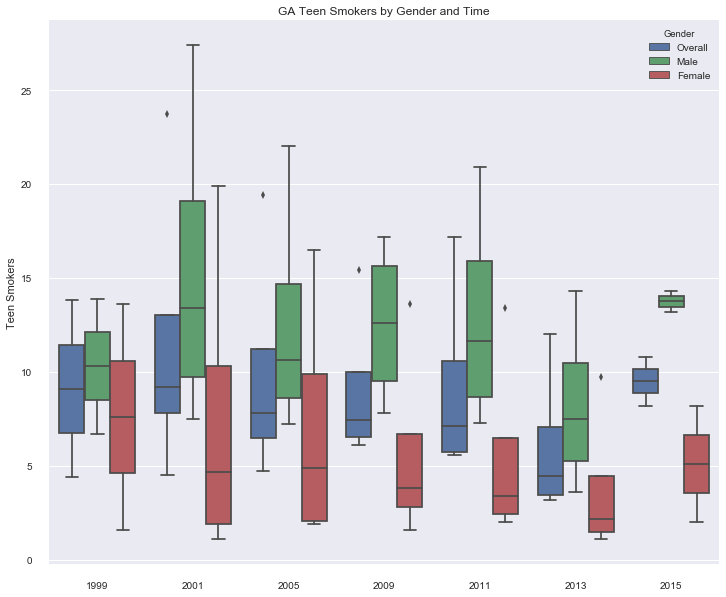

In [6]:
# Looking at teen smokers in Georgia over time by gender

fig, ax = plt.subplots(figsize=(12,10))
ax = sns.boxplot(x='YEAR',y='Data_Value',hue='Gender',data=df_ga_yts)  
sns.plt.title('GA Teen Smokers by Gender and Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Teen Smokers')

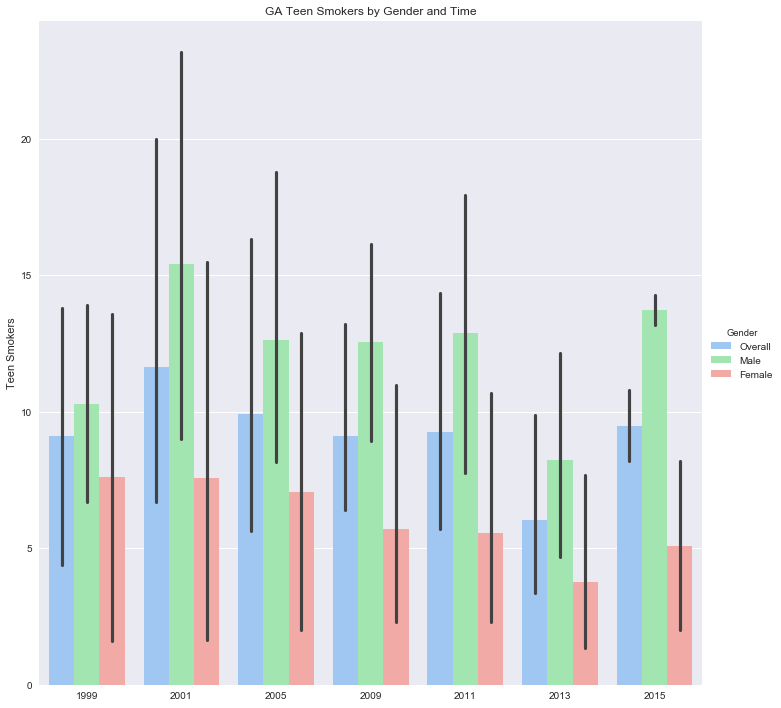

In [7]:
# An alternative bar plot for GA teen smokers by gender over time

sns.set(style="darkgrid")

g = sns.factorplot(x="YEAR", y="Data_Value", hue="Gender", data=df_ga_yts,
                   size=10, kind="bar", palette="pastel",ci=95)
g.despine(left=True)
g.set_ylabels("Teen Smokers")
g.set_xlabels("")
sns.plt.title('GA Teen Smokers by Gender and Time')
plt.show()

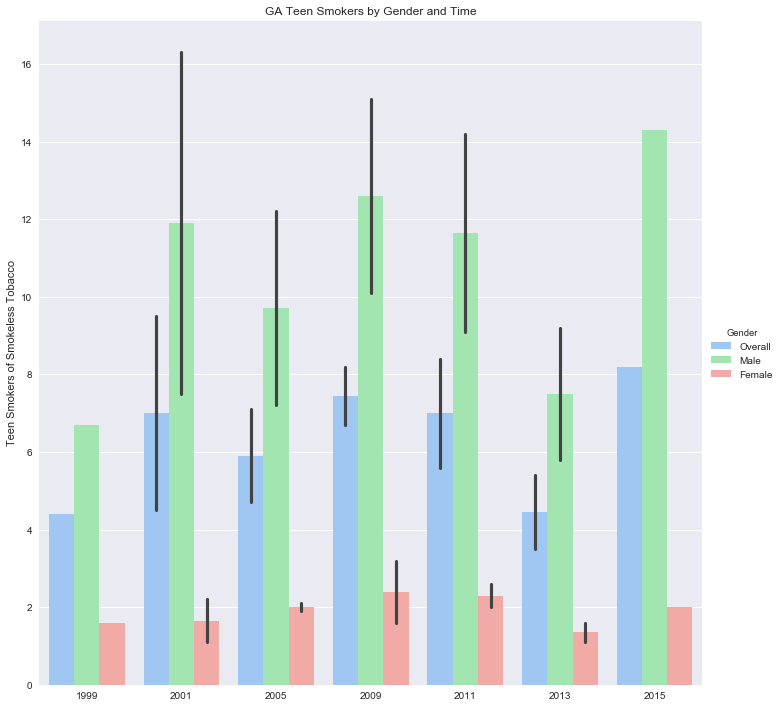

In [8]:
# Bar plot of Teen users of smokeless tobacco by gender over time

sns.set(style="darkgrid")

g = sns.factorplot(x="YEAR", y="Data_Value", hue="Gender", data=df_ga_smokeless,
                   size=10, kind="bar", palette="pastel",ci=95)
g.despine(left=True)
g.set_ylabels("Teen Smokers of Smokeless Tobacco")
g.set_xlabels("")
sns.plt.title('GA Teen Smokers by Gender and Time')
plt.show()

[<matplotlib.text.Text at 0x11983f860>, <matplotlib.text.Text at 0x119edd438>]

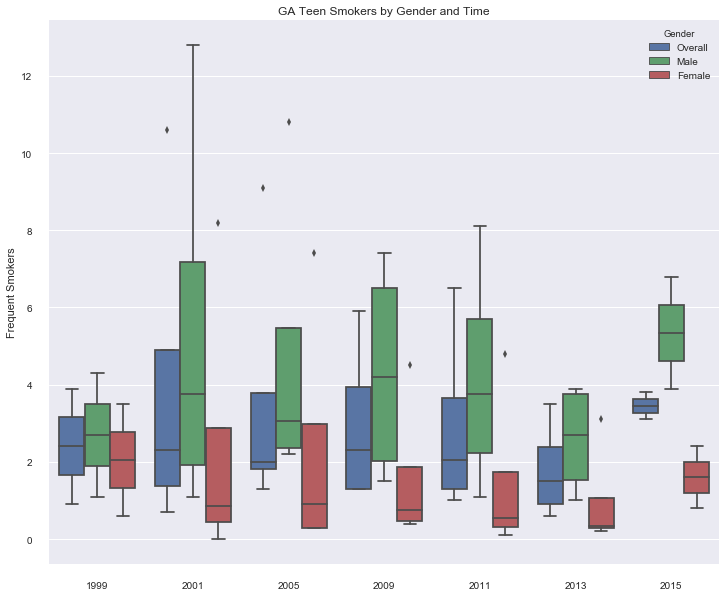

In [9]:
# Boxplot of Frequent Teen Smokers by gender over time 

fig, ax = plt.subplots(figsize=(12,10))
ax = sns.boxplot(x='YEAR',y='Data_Value',hue='Gender',data=df_ga_frequent)  
sns.plt.title('GA Teen Smokers by Gender and Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Frequent Smokers')

## Decision

If the results of our survey analysis show that teen tobacco use has decreased by 5 percent as a result of our new commercial, we will conclude that the commercial is effective at reducing teen tobacco use and will begin testing it in other markets.  If our analysis shows teen tobacco use decreases but by less than one standard deviation, we will run the commercial for two more months and run another survey before performing another analysis and making a decision.  If teen tabacco use remains unaffected beyond the standard deviation, we will stop running the commercial.